<a href="https://colab.research.google.com/github/Isferbr/Programacao_Cientifica/blob/main/Implementa%C3%A7%C3%A3o_do_PCA_utilizando_o_M%C3%A9todo_das_Covari%C3%A2ncias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementação do PCA utilizando o Método das Covariâncias

PCA, ou principal component analysis é uma técnica para reduzir a dimensão de um conjunto de dados preservando, de certa forma, suas propriedades. Executar essa técnica na mão ou sem ajuda de funções prontas é um bom exercício para aprender a fundo o que está por trás desse processo.

Iremos importar as bibliotecas necessárias

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos as seguintes matrizes para esse trabalho:

<table border="0">
<tr>
<td>
$$X = \left(
\begin{array}{lcr}
1 & 2\\
3 & 4\\
1 & 3\\
2 & 4\\
2 & 3\\
1 & 4
\end{array}
\right)$$
</td>
<td>
$$y = \left(
\begin{array}{lcr}
0\\
1\\
0\\
1\\
1\\
1
\end{array}
\right)$$  
</td>
</tr>
</table>

A matriz $X$ representa as features, equanto $y$ representa o target. Declararemos essas matrizes no Python:

In [ ]:
# matrizes no Python
df = pd.DataFrame({
    'var1': [1,3,1,2,2,1],
    'var2': [2,4,3,4,3,4],
    'target': [0,1,0,1,1,1] 
})
X = df.drop('target',1)
Y = df['target']

Precisaremos das médias de cada coluna de X. Para o cálculo da média da coluna i basta fazer a seguinte conta:

$$\frac{\sum_jX_{ji}}{n}$$

com n sendo o número de linhas da matriz X. Podemos conferir as contas no Python usando a biblioteca numpy:

In [ ]:
# média por coluna de X
mean_vec = np.mean(X, axis=0)
mean_vec

var1    1.666667
var2    3.333333
dtype: float64

Nossa próxima tarefa é determinar a matriz de covariância. Para isso, vamos usar uma matriz M auxiliar. Para determinar M subtraia a média da coluna i da coluna respectiva. Como no nosso exemplo todas as entradas de M estão multiplicadas por 1/3, para ficar mais elegante, colocamos 1/3 em evidência.

$$M = \frac{1}{3}
\left(
\begin{array}{rrr}
-2 & -4\\
 4 &  2\\
-2 & -1\\
 1 &  2\\
 1 & -1\\
-2 &  2
\end{array}
\right)$$

Para realizar a mesma conta no Python, use o código a seguir:

In [ ]:
# subtraindo a média da respectiva coluna de X
M = X - mean_vec
M.shape
M

,var1,var2
0,-0.666667,-1.333333
1,1.333333,0.666667
2,-0.666667,-0.333333
3,0.333333,0.666667
4,0.333333,-0.333333
5,-0.666667,0.666667


A matriz de covariância é de X é dada por

$$C = \frac{1}{n-1}M^{T}M$$

onde n é o número de linhas de X.

Logo,

$$C = \frac{1}{3}
\left(
\begin{array}{lcr}
2 & 1\\
1 & 2
\end{array}
\right)
$$

No Python:

In [ ]:
# calculando matriz de covariância
C = M.T.dot(M) / (X.shape[0]-1)
C

,var1,var2
var1,0.666667,0.333333
var2,0.333333,0.666667


Próximo passo é determinar auto-valores e auto-vetores da matriz de covariância $C$. Os auto-valores $\lambda$ de $C$ são raizes de

$$P_{C}(x) = det(C - xI)$$

onde I é a matriz identidade.

Cada auto-valor $\lambda$ tem auto-vetores associados. Apesar de auto-vetores nunca serem nulos, se incluírmos o vetor nulo no conjunto dos auto-vetores associados e chamarmos esse novo conjunto de $V(\lambda)$, temos que $V(\lambda)$ é o conjunto solução do seguinte sistema:

$$(C - \lambda I)X = 0$$

Tomaremos geradores unitários de $V(1)$ e de $V\left(\frac{1}{3}\right)$, a saber, tomaremos os seguintes auto-vetores:

$$\left\{
\left(\frac{\sqrt{2}}{2},-\frac{\sqrt{2}}{2}\right),
\left(\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2}\right)
\right\}.$$

Essa escolha não é única e isso pode dar pequenas diferenças nos resultados finais.

No Python:

In [ ]:
# determinando auto-valores e auto-vetores
auto_valores, auto_vetores = np.linalg.eig(C)

# imprimindo auto-valores de C
print("Auto-valores:")
print(auto_valores)

# imprimindo auto-vetores de C
print("Auto-vetores:")
print(auto_vetores)

Auto-valores:
[1.         0.33333333]
Auto-vetores:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Agora, ordenaremos os auto-valores do maior para o menor. Isso é necessário apenas se não tiverem ordenados dessa forma.

In [ ]:
# ordenando em ordem descrecente
pares_de_autos = [
     (
        np.abs(auto_valores[i]),
        auto_vetores[:,i]
     ) for i in range(len(auto_valores))             
]
pares_de_autos.sort()
pares_de_autos.reverse()


Nosso próximo passo é calcular o quanto cada componente (auto-vetores) estão representando (de certa forma) a variabilidade dos nossos dados. Para isso usaremos duas medidas.

A variância explicada de cada auto-valor $\lambda$ é dada por:

$$\frac{\lambda}{\sum_{j}\lambda_{j}}$$

A variância explicada acumulada de cada auto-valor $\lambda$ é a sobra das variâncias explicadas de todos auto-valores até $\lambda$ considerando a ordem do maior para o maior e incluindo o próprio $\lambda$.

Em Python:

In [ ]:
# calculando a variância explicada e a variância
total = sum(auto_valores)
var_exp = [
    (i / total) * 100 for i in sorted(
        auto_valores, reverse=True
    )       
]
cum_var_exp = np.cumsum(var_exp)

Vejamos de forma sumarizada que temos até o momento:

In [ ]:
# visualizando as informações
x = [
    'PC %s' %i for i in range(
        1,len(auto_valores)+1
    )
]
df_temp = pd.DataFrame(
    {'auto-valores': auto_valores,
     'cum_var-exp': cum_var_exp,
     'var_exp': var_exp,
     'Componente': x}
)
print(df_temp)
print()
print("Auto-vetores")
for auto_vetor in [p[1] for p in pares_de_autos]:
    print(auto_vetor)
print()

   auto-valores  cum_var-exp  var_exp Componente
0      1.000000         75.0     75.0       PC 1
1      0.333333        100.0     25.0       PC 2

Auto-vetores
[0.70710678 0.70710678]
[-0.70710678  0.70710678]



Agora faremos o uso do PCA utilizando apenas uma função que mostra o resultado para o conjunto de dados.

In [ ]:
def pca(X,pc_count=2):
  # média por coluna de X
  mean_X = np.mean(X,0)
  # subtraindo a média da respectiva coluna de X
  M = X - mean_X
  # calculando matriz de covariância
  C = np.cov(X, rowvar=False)
  # determinando auto-valores e auto-vetores
  auto_valores, auto_vetores = np.linalg.eig(C)
  # ordenando em ordem descrecente
  pares_de_autos = [(np.abs(auto_valores[i]), auto_vetores[:,i])
  for i in range(len(auto_valores))]
  pares_de_autos.sort()
  pares_de_autos.reverse()
  # calculando a variância explicada e a variância
  total = sum(auto_valores)
  var_exp = [(i / total) * 100 for i in sorted(auto_valores, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)
  # visualizando as informações
  x = ['PC %s' %i for i in range(1,len(auto_valores)+1)]
  df_temp = pd.DataFrame(
    {'auto-valores': auto_valores,
     'cum_var-exp': cum_var_exp,
     'var_exp': var_exp,
     'Componente': x}
  )
  print(df_temp)
  print()
  print("Auto-vetores")
  for auto_vetor in [p[1] for p in pares_de_autos]:
    print(auto_vetor)
  print()
 
  return pca

pca(X)

Considerando os dados originais como pares ordenados em $\mathbb{R}^{2}$, pois $X$ possui apenas duas colunas, ao mudar da base canônica para a base composta pelos auto-vetores encontrados, teremos uma nova representação do conjunto $X$. O gráfico fica da seguinte forma:

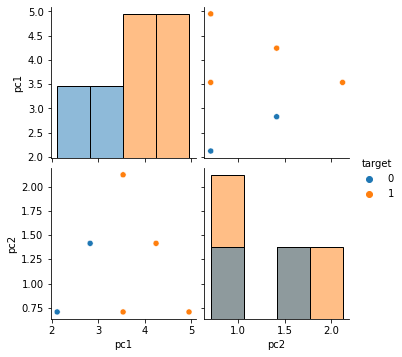

In [ ]:
# visualizando graficamente os dados através da mudança de base
# considerando a base de auto-vetores
numero_componentes = 2 # projetamos nas 2 (duas) primeiras componentes
auto_vetores = [p[1] for p in pares_de_autos]
A = auto_vetores[0:numero_componentes]
X = np.dot(X,np.array(A).T)
novo_df = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df['target'] = df['target']
sns.pairplot(
    novo_df,
    vars = ['pc1','pc2'],
    hue = 'target', 
    diag_kind = "hist"
)
plt.show()

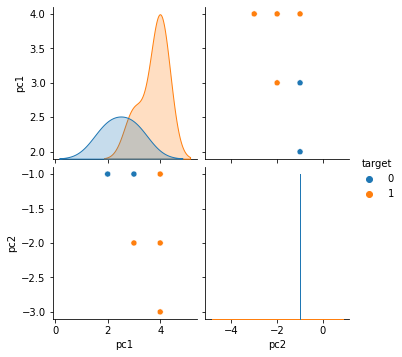

In [ ]:
# visualizando graficamente os dados através da mudança de base
# considerando a base de auto-vetores
numero_componentes = 2 # projetamos nas 2 (duas) primeiras componentes
auto_vetores = [p[1] for p in pares_de_autos]
A = auto_vetores[0:numero_componentes]
X = np.dot(X,np.array(A).T)
novo_df = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df['target'] = df['target']
sns.pairplot(
    novo_df,
    vars = ['pc1','pc2'],
    hue = 'target', 
    #diag_kind = "hist"
)
plt.show()

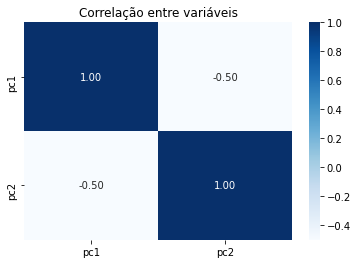

In [ ]:
novo_df = pd.DataFrame(X,columns=['pc1','pc2'])
novo_df.corr()
sns.heatmap(novo_df.corr(),
    annot = True,
    fmt = '.2f',
    cmap='Blues'
)
plt.title('Correlação entre variáveis')
plt.show()

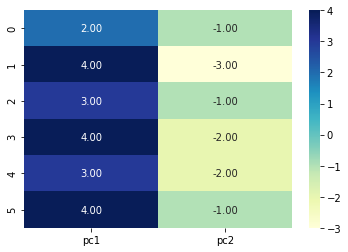

In [ ]:
sns.heatmap(novo_df, cmap="YlGnBu", annot=True, fmt = '.2f')
plt.show()

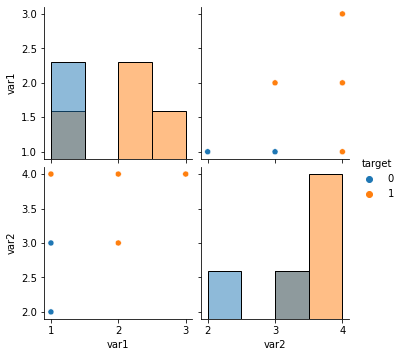

In [ ]:
# visualizando graficamente os dados originais
sns.pairplot(
    df,
    vars = ['var1','var2'],
    hue = 'target',
    diag_kind = "hist"
)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


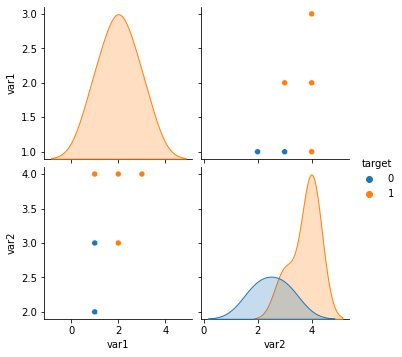

In [ ]:
# visualizando graficamente os dados originais
sns.pairplot(
    df,
    vars = ['var1','var2'],
    hue = 'target',
    #diag_kind = "hist"
)
plt.show()

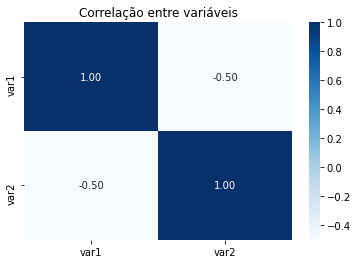

In [ ]:
df = pd.DataFrame(X,columns=['var1','var2'])
df.corr()
sns.heatmap(df.corr(),
    annot = True,
    fmt = '.2f',
    cmap='Blues'
)
plt.title('Correlação entre variáveis')
plt.show()

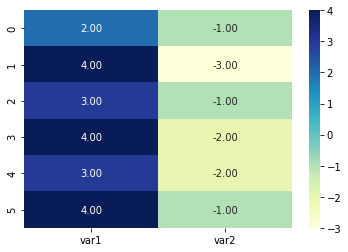

In [ ]:
sns.heatmap(df, cmap="YlGnBu", annot=True, fmt = '.2f')
plt.show()

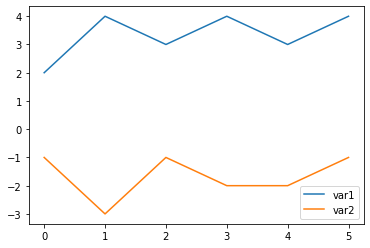

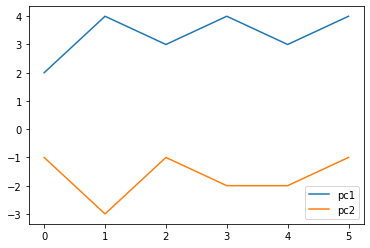

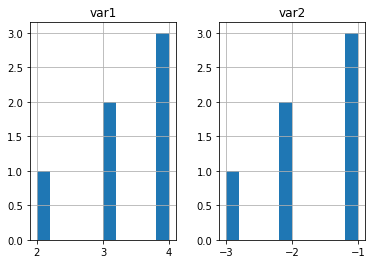

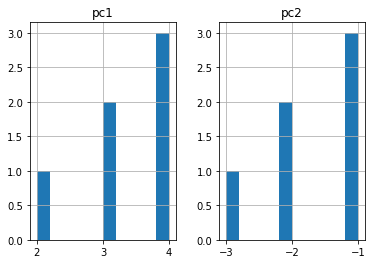

In [ ]:
df.plot()
novo_df.plot()
df.hist()
novo_df.hist()
plt.show()

## Fazendo com uso de biblioteca
Agora vamos fazer o mesmo exemplo utilizando a biblioteca Scikit-learn.

In [ ]:
# biblioteca
from sklearn.decomposition import PCA

# dados
df = pd.DataFrame({
     'var1':[1,3,1,2,2,1],
     'var2':[2,4,3,4,3,4],
     'target':[0,1,0,1,1,1]              
})
X = df.drop('target',1)
y = df['target']

# pca
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

Agora vamos ver as informações para fins de comparação.

In [ ]:
print("Auto-valores:")
print(pca.explained_variance_)
print()

print("Auto-vetores:")
print(pca.components_)
print()

print("Variância explicada:")
print(pca.explained_variance_ratio_)
print()

Auto-valores:
[1.         0.33333333]

Auto-vetores:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Variância explicada:
[0.75 0.25]



Observe que, como a escolha dos auto-vetores não é única, o algoritmo implementado na biblioteca Scikit-learn escolheu auto-vetores diferentes dos nossos. Mas, isso não é problema, pois só houve inversão de sinal. Logo, quando fizermos a visualização gráfica da mudança de coordenada, haverá uma inversão da figura.

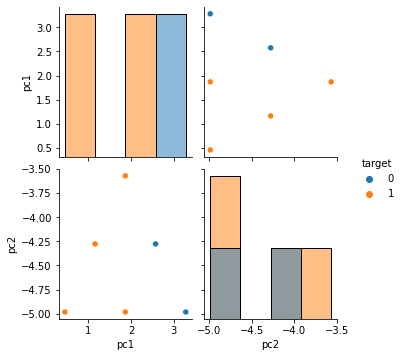

In [ ]:
# Transformando X
X = pca.transform(X)

# Visualizando
novo_df = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df['target'] = df['target']
sns.pairplot(
    novo_df,
    vars = ['pc1','pc2'],
    hue = 'target',
    diag_kind = "hist"
)
plt.show()

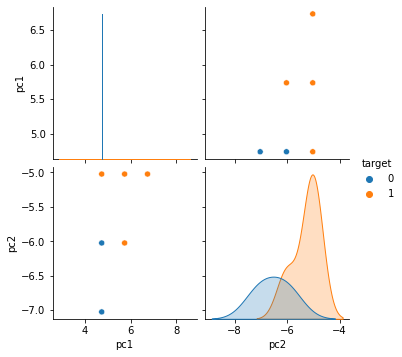

In [ ]:
# Transformando X
X = pca.transform(X)

# Visualizando
novo_df = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df['target'] = df['target']
sns.pairplot(
    novo_df,
    vars = ['pc1','pc2'],
    hue = 'target',
    #diag_kind = "hist"
)
plt.show()

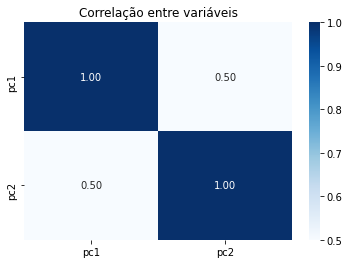

In [ ]:
novo_df = pd.DataFrame(X,columns=['pc1','pc2'])
#novo_df['target'] = df['target']
novo_df.corr()
sns.heatmap(novo_df.corr(),
    annot = True,
    fmt = '.2f',
    cmap='Blues'
)
plt.title('Correlação entre variáveis')
plt.show()

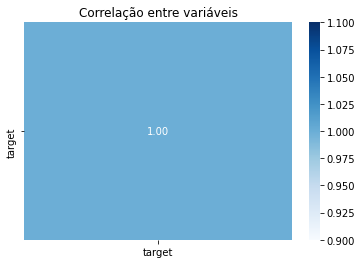

In [ ]:
novo_df = pd.DataFrame(Y,columns=['target'])
novo_df.corr()
sns.heatmap(novo_df.corr(),
    annot = True,
    fmt = '.2f',
    cmap='Blues'
)
plt.title('Correlação entre variáveis')
plt.show()

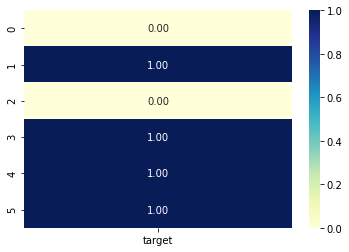

In [ ]:
sns.heatmap(novo_df, cmap="YlGnBu", annot=True, fmt = '.2f')
plt.show()

Como nosso exemplo é bem simples, mostraremos a seguir como seria a utilização do PCA em casos reais. 

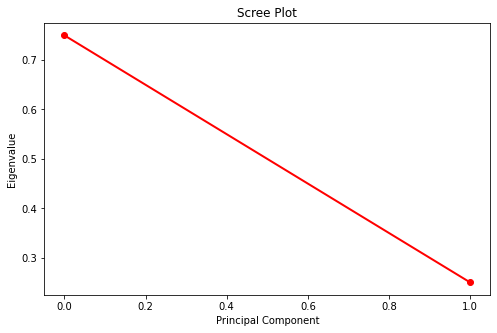

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

## PCA no conjunto de dados Iris
No próximo exemplo utilizaremos PCA para reduzir o conjunto de dados Iris de 4 para 2 features.

In [ ]:
# dados
#df = pd.read_csv('/content/drive/MyDrive/Implementação do PCA/iris.data',header=None)
df = sns.load_dataset("iris")
df.columns = [
    'sepal length in cm',
    'sepal width in cm',
    'petal length in cm',
    'petal width in cm',
    'target'     
]
X = df.drop('target', 1)
y = df['target']
#print(X)
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Faremos novamente o passo a passo análogo ao código usado no exemplo anterior.

In [ ]:
def mean_vec(X):
  return np.mean(X, axis=0)

mean_vec(X)


sepal length in cm    5.843333
sepal width in cm     3.057333
petal length in cm    3.758000
petal width in cm     1.199333
dtype: float64

In [ ]:
mean_vec = np.mean(X, axis = 0)
M = X - mean_vec
C = M.T.dot(M) / (X.shape[0]-1)
auto_valores, auto_vetores = np.linalg.eig(C)
pares_de_autos = [
     (
        np.abs(auto_valores[i]),
        auto_vetores[:,i]
     ) for i in range(len(auto_valores))             
]
pares_de_autos.sort()
pares_de_autos.reverse()
total = sum(auto_valores)
var_exp = [
    (i / total)*100 for i in sorted(auto_valores, reverse=True)       
]
cum_var_exp = np.cumsum(var_exp)

Para imprimir as informações sumarizadas:

In [ ]:
x = ['PC %s' %i for i in range(1,len(auto_valores)+1)]
df_temp = pd.DataFrame(
    {'auto-valores': auto_valores,
     'cum_var_exp': cum_var_exp,
     'var_exp': var_exp,
     'Componente': x}
)
print(df_temp)
print()
print("Auto-vetores")
for auto_vetor in [p[1] for p in pares_de_autos]:
  print(auto_vetor)
print()

   auto-valores  cum_var_exp    var_exp Componente
0      4.228242    92.461872  92.461872       PC 1
1      0.242671    97.768521   5.306648       PC 2
2      0.078210    99.478782   1.710261       PC 3
3      0.023835   100.000000   0.521218       PC 4

Auto-vetores
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
[-0.65658877 -0.73016143  0.17337266  0.07548102]
[-0.58202985  0.59791083  0.07623608  0.54583143]
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]



Com duas componentes temos uma variância explicada cumulativa de 97%. Utilizaremos então, apenas duas componentes. Agora visualizaremos as informações graficamente utilizamos o seguinte código:

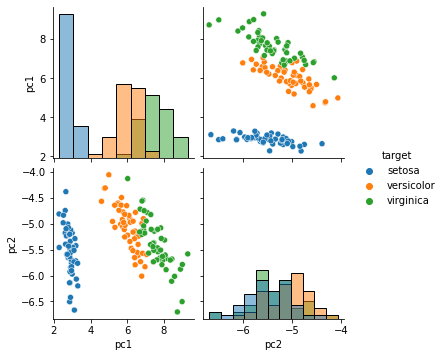

In [ ]:
numero_componentes = 2
auto_vetores = [p[1] for p in pares_de_autos]
A = auto_vetores[0:numero_componentes]
X = np.dot(X,np.array(A).T)
novo_df = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df['target'] = df['target']
sns.pairplot(
    novo_df,
    vars = ['pc1','pc2'],
    hue = 'target',
    diag_kind = "hist"
)
plt.show()

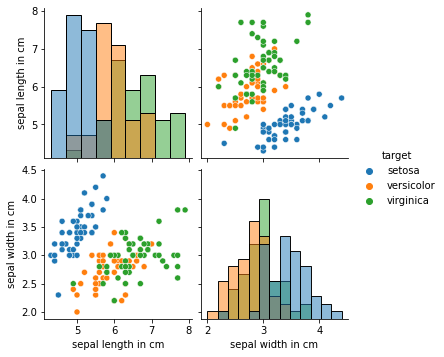

In [ ]:
# visualizando graficamente os dados originais
sns.pairplot(
    df,
    vars = ['sepal length in cm','sepal width in cm'],
    hue = 'target',
    diag_kind = "hist"
)
plt.show()

## PCA no conjunto de dados Iris com biblioteca

Novamente, carregamos o conjunto de dados.

In [ ]:
# dados
#url = “https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#df = pd.read_csv('/content/drive/MyDrive/Implementação do PCA/iris.data',header=None)
df = sns.load_dataset("iris")
df.columns = [
    'sepal length in cm',
    'sepal width in cm',
    'petal length in cm',
    'petal width in cm',
    'target'     
]
X = df.drop('target', 1)
y = df['target']


Repetimos então o processo, mas desta vez, utilizando o PCA já pronto.

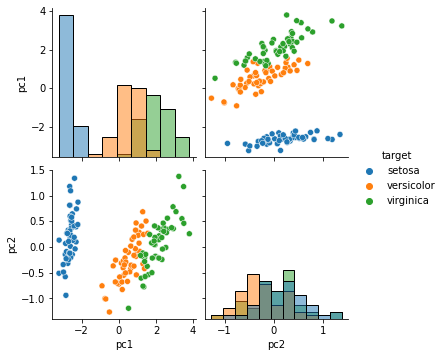

In [ ]:
pca.fit(X)
X = pca.transform(X)
novo_df = pd.DataFrame(X, columns=['pc1','pc2'])
novo_df['target'] = df['target']
sns.pairplot(
    novo_df,
    vars = ['pc1','pc2'],
    hue = 'target',
    diag_kind = "hist"
)
plt.show()

## PCA para redução de dimensão em imagens

Outra aplicação é a redução de dimensão em imagens. Para esse exemplo, escolhemos a imagem Pássaro retirada do site Pixabay. A imagem foi transformada em escala de cinza utilizando o software GIMP.

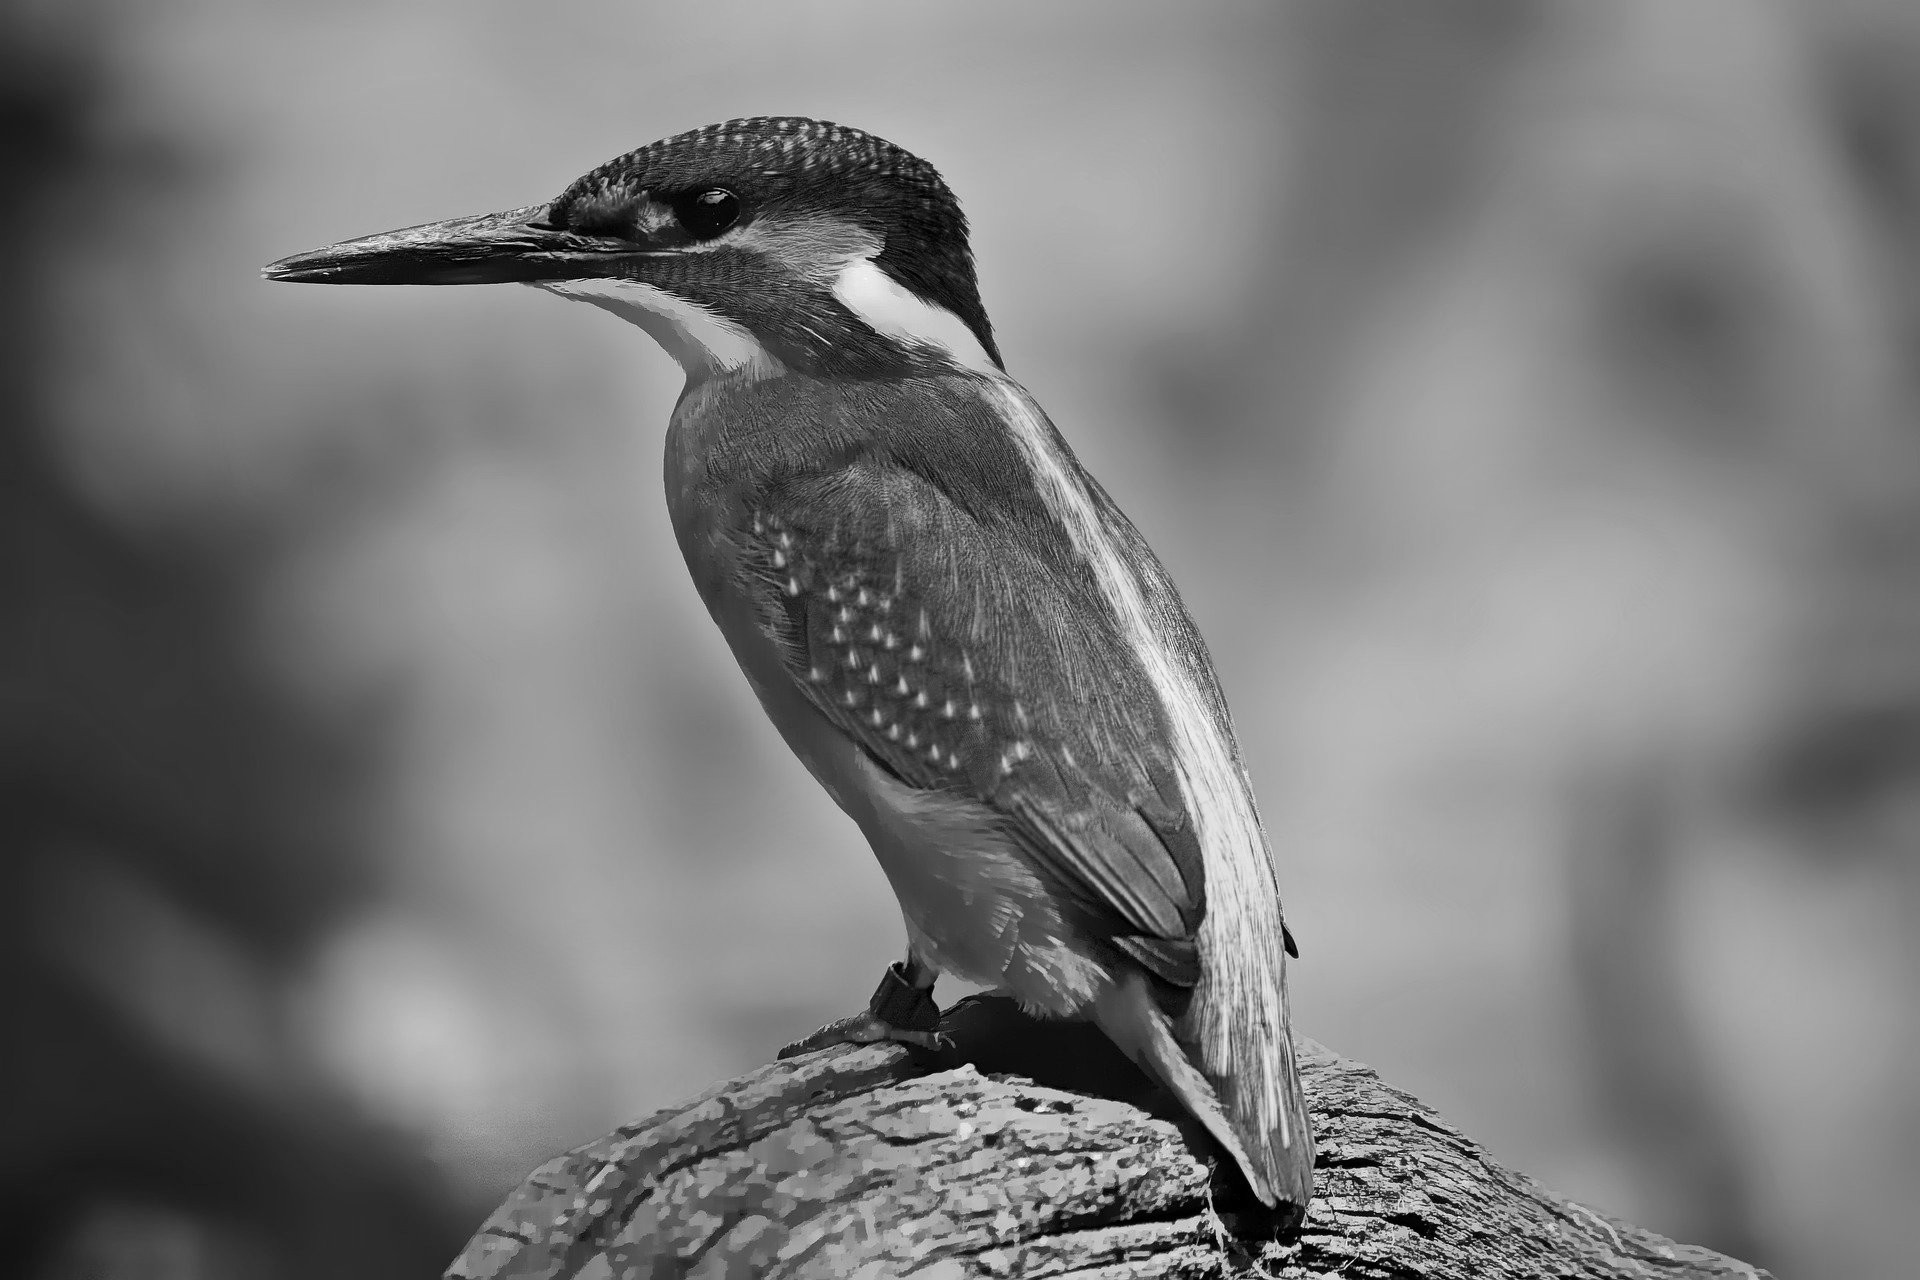



Primeiro, carregaremos a imagem.

In [ ]:
# carregando a imagem e visualizando dimensões
X = plt.imread('/content/drive/MyDrive/Implementação do PCA/bird_1905255_1920.jpg')
X.shape


(1280, 1920)

Observe que a matriz tem 1280 linhas e 1920 colunas. Em seguida, aplicaremos a técnica PCA.

In [ ]:
# aplicando PCA
pca = PCA(0.99) # variância explicada de 0.99
lower_dimension_data = pca.fit_transform(X)
lower_dimension_data.shape

(1280, 334)

O número 0.99 passado como parâmetro para o métodos PCA diz que queremos um número de componentes que nos garanta 99% de variância explicada cumulativa. Observe que para isso, utilizou-se 334 componentes. Isso é uma redução imensa, uma vez que a original possuia 1920 colunas. Queremos ver, caso necessário recuperar a imagem, como essas imagens ficam com a dimensão reduzida. Para isso serão necessários duas funções auxiliares.

In [ ]:
def pca_with_var_exp(X, var_exp=0.99):
  pca = PCA(var_exp) # variância explicada de 0.99
  lower_dimension_data = pca.fit_transform(X)
  print(lower_dimension_data.shape)
  approximation = pca.inverse_transform(
      lower_dimension_data
  )
  return approximation

def plot_subplot(X, i):
  plt.subplot(3,2,i)
  plt.imshow(X, cmap="gray")
  plt.xticks([])
  plt.yticks([])

A primeira função reduz a imagem X mantendo var_exp de variância explicada cumulativa. Compararemos 3 valores: 0.99, 0.95 e 0.90.

In [ ]:
# calculando algumas aproximações
img_1 = pca_with_var_exp(X, var_exp=0.99)
img_2 = pca_with_var_exp(X, var_exp=0.95)
img_3 = pca_with_var_exp(X, var_exp=0.90)

(1280, 334)
(1280, 99)
(1280, 42)


A segunda função mostra o gráfico. Utilizaremos ela para comparar as imagens obtidas com a original.

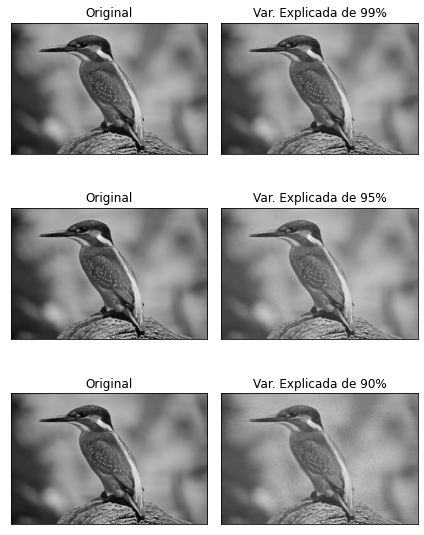

In [ ]:
# visualizando aproximações
plt.figure(figsize=(6,8))

plot_subplot(X, 1)
plt.title("Original")
plot_subplot(img_1, 2)
plt.title("Var. Explicada de 99%")
plot_subplot(X, 3)
plt.title("Original")
plot_subplot(img_2, 4)
plt.title("Var. Explicada de 95%")
plot_subplot(X, 5)
plt.title("Original")
plot_subplot(img_3, 6)
plt.title("Var. Explicada de 90%")

plt.tight_layout()
plt.show()

## Referências
https://en.wikipedia.org/wiki/Principal_component_analysis

https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

https://pixabay.com/pt/photos/p%C3%A1ssaro-mineiro-barulhento-4580638/

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

https://leandrocruvinel.medium.com/pca-na-m%C3%A3o-e-no-python-d559e9c8f053
